# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high)
#size : Output shape: int or tuple of ints, optional
# test size = 150 , actual size 1500, reduces to about 600 unqiue values
lats = np.random.uniform(low=-90.000, high=90.000, size=15)
lngs = np.random.uniform(low=-180.000, high=180.000, size=15)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cityCount=len(cities)

In [3]:
#Prepare containers (City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed)
rcities=[]
rlats=[]
rlngs=[]
clouds=[]
countries=[]
dates=[]
humidities=[]
mxTemps=[]
winds=[]
degs=[]
wdds=[]
#wddsU= ['','','','','','','','']#np.zeros(8)
markers=[]
colors=[]

In [4]:
### Perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"  # not metric
appid = api_key
query_url = url+"appid="+api_key+"&units="+units+"&q="

cityCounter=1
for city in cities:
    try:
        city_query_url = query_url+city 
        response = requests.get(city_query_url).json()
        rcities.append(response['name'])
        rlats.append(response['coord']['lat'])
        rlngs.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        mxTemps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        degs.append(response['wind']['deg'])       
        d= int(response['wind']['deg'])
        if  d > 337 or d < 22.5:
            markers.append('\\rightarrow')
            colors.append('tab:blue')
            wdds.append('E')
        elif d >=22.5 and d <65:
            markers.append('\\nearrow')
            colors.append('tab:orange')
            wdds.append('NE')
        elif d >=65 and d< 112.5:
            markers.append('\\uparrow')
            colors.append('tab:green')
            wdds.append('N')
        elif d >=112.5 and d < 157.5:
            markers.append('\\nwarrow')
            colors.append('tab:red')
            wdds.append('NW')
        elif d >=157.5 and d < 202.5:
            markers.append('\\leftarrow')
            colors.append('tab:purple')
            wdds.append('W')
        elif d >=202.5 and d < 247.5:
            markers.append('\\swarrow')
            colors.append('tab:brown')
            wdds.append('SW')
        elif d >=247.5 and d < 292.5:
            markers.append('\\downarrow')
            colors.append('tab:pink')
            wdds.append('S')
        else: 
            markers.append('\\searrow')
            colors.append('tab:olive')
            wdds.append('SE')     
        print("Processing Record "+str( cityCounter)+ " of " +str(cityCount)+" | " + city)
        cityCounter= cityCounter+1
    except:
        print('Skipped '+city)


Processing Record 1 of 15 | burnie
Processing Record 2 of 15 | port alfred
Processing Record 3 of 15 | bredasdorp
Processing Record 4 of 15 | barcelona
Processing Record 5 of 15 | bluff
Processing Record 6 of 15 | terney
Processing Record 7 of 15 | rikitea
Processing Record 8 of 15 | camapua
Processing Record 9 of 15 | hermanus
Processing Record 10 of 15 | butaritari
Processing Record 11 of 15 | provideniya
Processing Record 12 of 15 | ariquemes
Processing Record 13 of 15 | tupik
Processing Record 14 of 15 | portland
Processing Record 15 of 15 | kununurra


In [5]:
print(len(rcities), len(countries), 
    len(dates),len(rlats),len(rlngs),len(clouds),len(humidities),len(mxTemps),len(winds), len(degs), len(wdds))

15 15 15 15 15 15 15 15 15 15 15


In [8]:
### Convert Raw Data to DataFrame & save
weather_dict = {
    "City": rcities,
    "Country":countries,
    "Date":dates,
    "Lat": rlats,
    "Long": rlngs,
    "Cloudiness": clouds,
    "Humidity": humidities,
    "Max Temp.":mxTemps,
    "Wind Speed": winds,
    "Wind Direction":degs,
    "wdd":wdds
}

weather_data = pd.DataFrame(weather_dict)
now = datetime.now()

filen="weatherData"+now.strftime("%Y%m%d") +".csv"
weather_data.to_csv(filen)

weather_data.head()

,City,Country,Date,Lat,Long,Cloudiness,Humidity,Max Temp.,Wind Speed,Wind Direction,wdd
0,Burnie,AU,1544679016,-41.05,145.91,92,95,62.41,23.78,97.50480,N
1,Port Alfred,ZA,1544678205,-33.59,26.89,12,90,68.08,10.25,263.50500,S
2,Bredasdorp,ZA,1544677200,-34.53,20.04,80,63,66.20,4.70,350.00000,E
3,Barcelona,ES,1544677200,41.38,2.18,20,81,50.00,8.05,330.00000,SE
4,Bluff,AU,1544678895,-23.58,149.07,92,95,73.43,5.10,3.00476,E


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


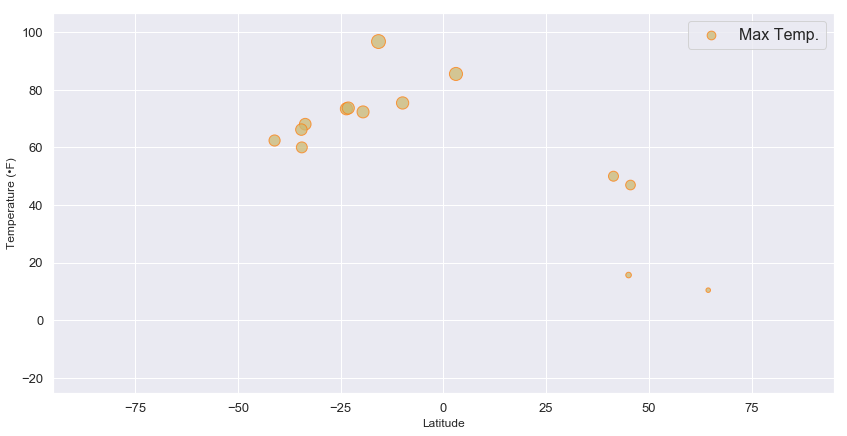

In [31]:
import seaborn as sns
sns.set()

# x: lat , y: temp
x= weather_data['Lat']
y= weather_data['Max Temp.']
s= y*2
plt.figure(figsize=(14, 7), dpi= 72)

plt.scatter(x,y, marker='o',s=s, facecolors='y' ,edgecolors='tab:orange', alpha=0.75)
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(min(weather_data['Max Temp.'])-5,max(weather_data['Max Temp.'])+10), 
              xlabel='Latitude', 
              ylabel='Temperature (•F)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Temperature (F) vs. Latitude '
plt.legend(fontsize=16)
plt.show()

#### Latitude vs. Humidity Plot

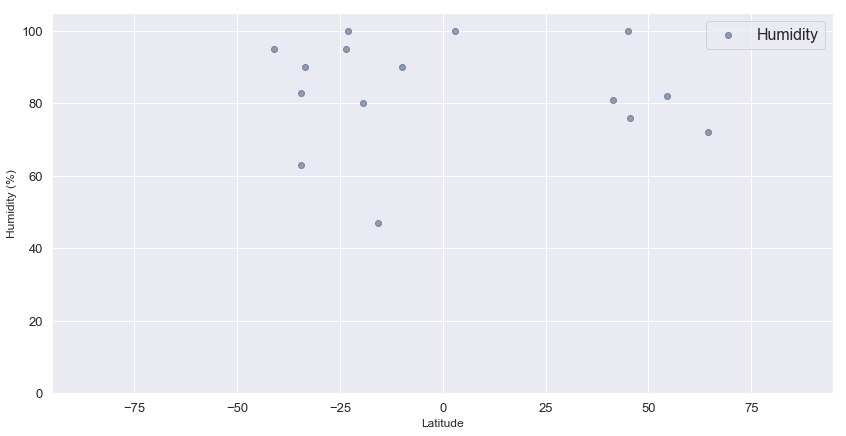

In [32]:
x= weather_data['Lat']
y= weather_data['Humidity']
s= y*10
plt.figure(figsize=(14, 7), dpi= 72)

plt.scatter(x,y, marker='o', facecolors='tab:gray' ,edgecolors='b', alpha=0.75)
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(0,105), 
              xlabel='Latitude', 
              ylabel='Humidity (%)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Humidity  vs. Latitude '
plt.legend(fontsize=16)
plt.show()

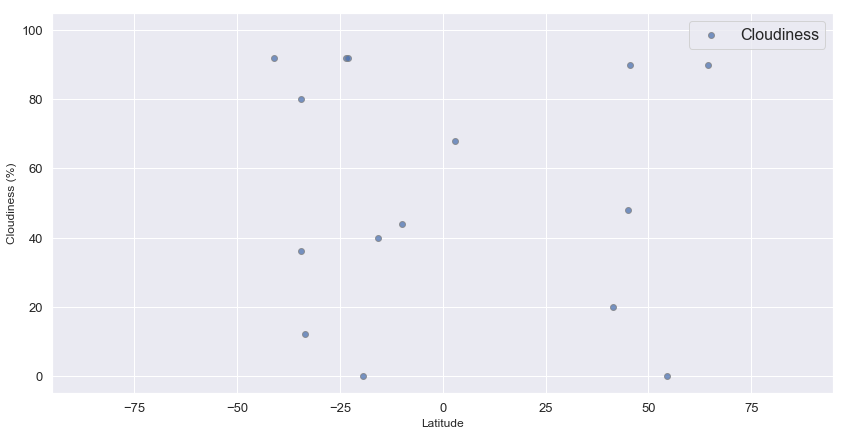

In [33]:
x= weather_data['Lat']
y= weather_data['Cloudiness']
s= y*10
plt.figure(figsize=(14, 7), dpi= 72)

plt.scatter(x,y, marker='o', facecolors='b' ,edgecolors='tab:gray', alpha=0.75)
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(-5,105), 
              xlabel='Latitude', 
              ylabel='Cloudiness (%)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Cloudiness  vs. Latitude '
plt.legend(fontsize=16)
plt.show()

 #Latitude vs. Wind Speed Plot

In [35]:
#sns.unset()

avmarkers_df=pd.DataFrame(markers,degs).reset_index()

def getMarker(i):
    return "$"+markers[i% len(markers)]+"$"

def getColor(i):
    return colors[i% len(colors)]


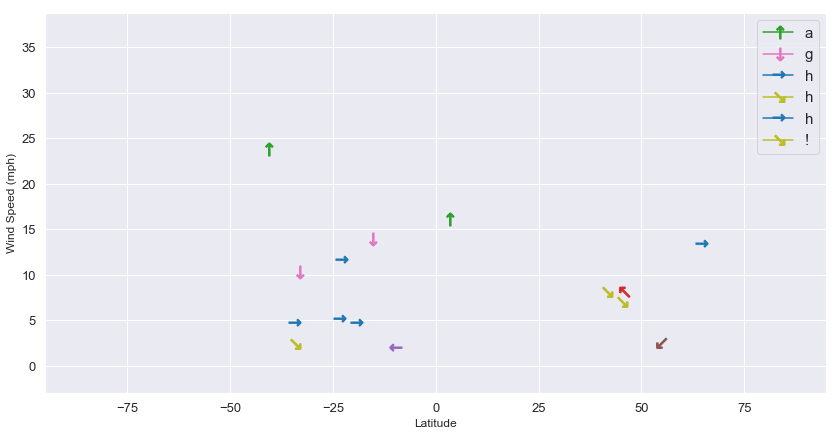

In [37]:


x= weather_data['Lat']
y= weather_data['Wind Speed']
s= y*10
plt.figure(figsize=(14, 7), dpi= 72)

#plt.scatter(x,y, marker=markers, facecolors='tab:gray' ,edgecolors='b', alpha=0.75)
for c, value in enumerate(markers):
    plt.plot(x[c],y[c], marker=getMarker(c), c=getColor(c), markersize=13)
#gca=get current axis
plt.gca().set(xlim=(-95,95), 
              ylim=(min(weather_data['Wind Speed']-5),max(weather_data['Wind Speed']+15)), 
              xlabel='Latitude', 
              ylabel='Wind Speed (mph)')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title='Wind Speed vs. Latitude '

plt.legend('aghhh!',fontsize=15)
plt.show()

In [23]:
weather_data
weather_data.wdd.unique()


array(['N', 'S', 'E', 'SE', 'W', 'SW', 'NW'], dtype=object)